# Predict Credit Card Churning Customers

* **Problem Statement**: A bank manager is uncomfortable with more and more customers leaving their credit card services.

* **Goal**: Predict customers who are likely drop off from credit card services(going to churn) for a bank so that they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

* **Advantage**: Data is clean, so relatively less time to spend on data cleaning and more time on modelling

* **Disadvantage**: Data is unbalanced; only 16.07% of customers churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# EDA

In [3]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [4]:
#df.drop(df[['0','1']],axis=1)
df=df.drop(df.columns[[0, 21, 22]],axis = 1)

# List Variables

In [5]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
df.shape

(10127, 20)

In [7]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print("Attrition_Flag : ",df['Attrition_Flag'].unique())
print("Gender:",df['Gender'].unique())
print("Dependent_count:",df['Dependent_count'].unique())
print("Education_Level:",df['Education_Level'].unique())
print("Marital_Status:",df['Marital_Status'].unique())
print("Income_Category:",df['Income_Category'].unique())
print("Card_Category:",df['Card_Category'].unique())

Attrition_Flag :  ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Dependent_count: [3 5 4 2 0 1]
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [10]:
print("Attrition_Flag :\n ",df['Attrition_Flag'].value_counts())
print("Gender:\n",df['Gender'].value_counts())
print("Dependent_count:\n",df['Dependent_count'].value_counts())
print("Education_Level:\n",df['Education_Level'].value_counts())
print("Marital_Status:\n",df['Marital_Status'].value_counts())
print("Income_Category:\n",df['Income_Category'].value_counts())
print("Card_Category:\n",df['Card_Category'].value_counts())

Attrition_Flag :
  Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender:
 F    5358
M    4769
Name: Gender, dtype: int64
Dependent_count:
 3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
Education_Level:
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status:
 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category:
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category:
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


# Visualization

Text(0.5, 1.0, 'Educational level vs Card_category')

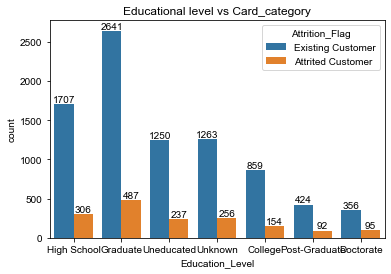

In [11]:
ax=sns.countplot(x=df['Education_Level'],hue='Attrition_Flag',data=df)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Educational level vs Card_category')            


Text(0.5, 1.0, 'incomelevel vs Card_category')

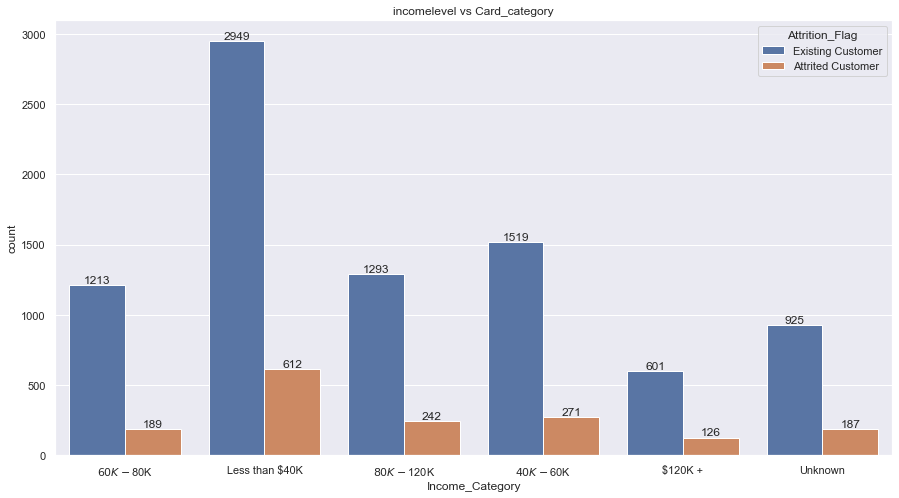

In [12]:
ax=sns.countplot(x=df['Income_Category'],hue='Attrition_Flag',data=df)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(15,8)})
plt.title('incomelevel vs Card_category')

Text(0.5, 1.0, 'Marital_Status vs Card_category')

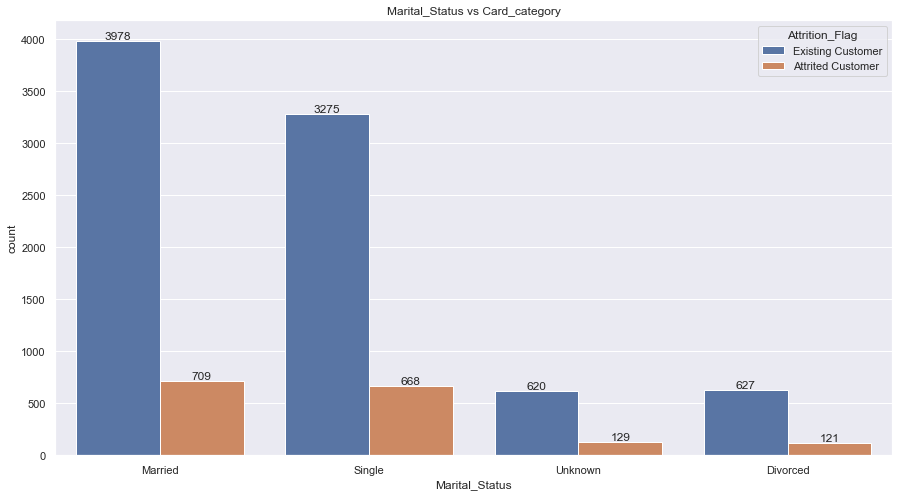

In [13]:
ax=sns.countplot(x=df['Marital_Status'],hue='Attrition_Flag',data=df)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Marital_Status vs Card_category')

In [14]:
df[df=='Unknown'].count()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [15]:
# filling unknown values in object .. Mode will be used

#Education_Level: Graduate(most occured)
#Marital_Status:Married
#Income_Category:Less than $40K

df['Education_Level'].replace({'Unknown':'Graduate'},inplace=True)

df['Marital_Status'].replace({'Unknown':'Married'},inplace=True)

df['Income_Category'].replace({'Unknown':'Less than $40K'},inplace=True)

In [16]:
df[df=='Unknown'].count()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [17]:
print("Education_Level:\n",df['Education_Level'].value_counts())
print("Marital_Status:\n",df['Marital_Status'].value_counts())
print("Income_Category:\n",df['Income_Category'].value_counts())

Education_Level:
 Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status:
 Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category:
 Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64


<AxesSubplot:>

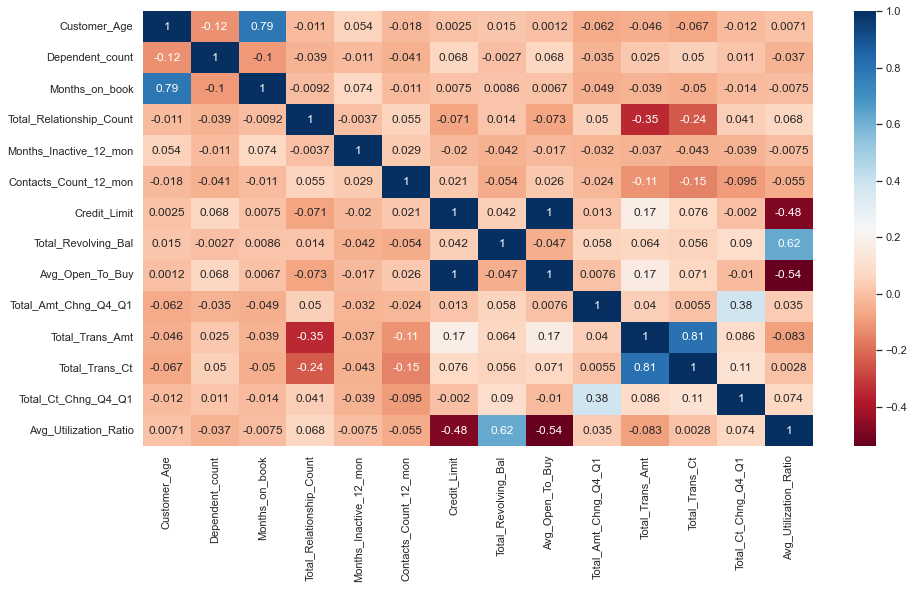

In [18]:
sns.heatmap(data=df.corr(),annot=True,cmap = 'RdBu')

In [19]:
df.select_dtypes(['int64']).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
def standardize_int_columns(data):
    int_columns = df.select_dtypes(['int64']).columns
    sd = StandardScaler()
    for col in int_columns:
        data[col] = sd.fit_transform(data[col].values.reshape(-1,1))
    return data


In [21]:
df=standardize_int_columns(df)

In [22]:
df.select_dtypes(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Married,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Graduate,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Married,$40K - $60K,Blue


In [23]:
# encoding category columns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition_Flag']=le.fit_transform(df['Attrition_Flag'])
df['Gender']=le.fit_transform(df['Gender'])
df['Education_Level']=le.fit_transform(df['Education_Level'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Income_Category']=le.fit_transform(df['Income_Category'])
df['Card_Category']=le.fit_transform(df['Card_Category'])



In [24]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,12691.0,-0.473422,11914.0,1.335,-0.959707,-0.973895,1.625,0.061
1,1,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,8256.0,-0.366667,7392.0,1.541,-0.916433,-1.357340,3.714,0.105
2,1,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,3418.0,-1.426858,3418.0,2.594,-0.740982,-1.911206,2.333,0.000
3,1,-0.789126,0,1.273283,3,1,4,0,-0.241473,-0.522785,1.641478,-1.315636,3313.0,1.661686,796.0,1.405,-0.951758,-1.911206,2.333,0.760
4,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,4716.0,-1.426858,4716.0,2.175,-1.056263,-1.570365,2.500,0.000


In [25]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [26]:
x=df.drop(df.columns[[0,17]],axis=1)

In [27]:
y=df['Attrition_Flag']

# Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
y_train.value_counts()

1    6801
0    1300
Name: Attrition_Flag, dtype: int64

# Logistic Regression Classification

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
LRAcc = accuracy_score(lr_pred,y_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.32      0.45       327
           1       0.88      0.98      0.93      1699

    accuracy                           0.87      2026
   macro avg       0.81      0.65      0.69      2026
weighted avg       0.86      0.87      0.85      2026

Confusion Matrix:
 [[ 105  222]
 [  38 1661]]
LR accuracy: 87.17%


In [32]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred_prob=classifier.predict_proba(x_test)
print(y_pred_prob)

[[0.21289598 0.78710402]
 [0.15621464 0.84378536]
 [0.15761019 0.84238981]
 ...
 [0.30018848 0.69981152]
 [0.03348267 0.96651733]
 [0.03782025 0.96217975]]


In [33]:
lr_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.41:
        lr_pred_class.append(1)
    else:
        lr_pred_class.append(0)
print(lr_pred_class)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [34]:
LRAcc = accuracy_score(lr_pred_class,y_test)
print('Classification Report:\n',classification_report(y_test,lr_pred_class))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred_class))
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.25      0.39       327
           1       0.87      0.99      0.93      1699

    accuracy                           0.87      2026
   macro avg       0.87      0.62      0.66      2026
weighted avg       0.87      0.87      0.84      2026

Confusion Matrix:
 [[  83  244]
 [  12 1687]]
LR accuracy: 87.36%


In [35]:
lr_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        lr_pred_class.append(1)
    else:
        lr_pred_class.append(0)
print(lr_pred_class)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [36]:
LRAcc = accuracy_score(lr_pred_class,y_test)
print('Classification Report:\n',classification_report(y_test,lr_pred_class))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred_class))
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.29      0.43       327
           1       0.88      0.99      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.85      0.64      0.68      2026
weighted avg       0.87      0.88      0.85      2026

Confusion Matrix:
 [[  94  233]
 [  20 1679]]
LR accuracy: 87.51%


In [37]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 257  , type 2 error : 11  , type 1 error: 246
Errors at threshold  0.41000000000000003 : 256  , type 2 error : 12  , type 1 error: 244
Errors at threshold  0.42000000000000004 : 253  , type 2 error : 14  , type 1 error: 239
Errors at threshold  0.43000000000000005 : 251  , type 2 error : 15  , type 1 error: 236
Errors at threshold  0.44000000000000006 : 252  , type 2 error : 18  , type 1 error: 234
Errors at threshold  0.45000000000000007 : 253  , type 2 error : 20  , type 1 error: 233
Errors at threshold  0.4600000000000001 : 258  , type 2 error : 26  , type 1 error: 232
Errors at threshold  0.4700000000000001 : 258  , type 2 error : 27  , type 1 error: 231
Errors at threshold  0.4800000000000001 : 259  , type 2 error : 31  , type 1 error: 228
Errors at threshold  0.4900000000000001 : 259  , type 2 error : 35  , type 1 error: 224
Errors at threshold  0.5000000000000001 : 260  , type 2 error : 38  , type 1 error: 222
Errors at threshold  0.5100000000000001 : 

# GaussianNB Classification

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
NBAcc = accuracy_score(gnb_pred,y_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report:\n',classification_report(y_test,gnb_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,gnb_pred))
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.36      0.46       327
           1       0.89      0.96      0.92      1699

    accuracy                           0.86      2026
   macro avg       0.76      0.66      0.69      2026
weighted avg       0.85      0.86      0.85      2026

Confusion Matrix:
 [[ 119  208]
 [  70 1629]]
Gaussian Naive Bayes accuracy: 86.28%


# Decision Tree Classification

In [40]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
ds_pred=ds.predict(x_test)
DTAcc = accuracy_score(ds_pred,y_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report:\n',classification_report(y_test,ds_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ds_pred))
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       327
           1       0.95      0.96      0.95      1699

    accuracy                           0.92      2026
   macro avg       0.87      0.84      0.85      2026
weighted avg       0.92      0.92      0.92      2026

Confusion Matrix:
 [[ 237   90]
 [  65 1634]]
Decision Tree Accuracy: 92.35%


In [42]:
model_DecisionTree=DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,random_state=10)
model_DecisionTree.fit(x_train,y_train)
ds_pred=model_DecisionTree.predict(x_test)
DTAcc2 = accuracy_score(ds_pred,y_test)
print(ds_pred)

[1 1 1 ... 1 1 1]


In [43]:
print('Classification Report:\n',classification_report(y_test,ds_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ds_pred))
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc2*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       327
           1       0.93      0.97      0.95      1699

    accuracy                           0.92      2026
   macro avg       0.86      0.80      0.83      2026
weighted avg       0.91      0.92      0.91      2026

Confusion Matrix:
 [[ 208  119]
 [  53 1646]]
Decision Tree Accuracy: 91.51%


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
RFAcc = accuracy_score(rf_pred,y_test)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report:\n',classification_report(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80       327
           1       0.95      0.99      0.97      1699

    accuracy                           0.94      2026
   macro avg       0.93      0.85      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Confusion Matrix:
 [[ 234   93]
 [  22 1677]]
Random Forest Accuracy:  94.32%


In [46]:
model_RandomForest= RandomForestClassifier(n_estimators=50,random_state=10,
                                         bootstrap=True)
model_RandomForest.fit(x_train,y_train)
rf_pred=model_RandomForest.predict(x_test)
RFAcc2 = accuracy_score(rf_pred,y_test)

In [47]:
print('Classification Report:\n',classification_report(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc2*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       327
           1       0.95      0.98      0.96      1699

    accuracy                           0.94      2026
   macro avg       0.91      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Confusion Matrix:
 [[ 239   88]
 [  33 1666]]
Random Forest Accuracy:  94.03%


# KNN Classification

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
KNAcc = accuracy_score(knn_pred,y_test)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Classification Report:\n',classification_report(y_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,knn_pred))
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.21      0.28       327
           1       0.86      0.94      0.90      1699

    accuracy                           0.83      2026
   macro avg       0.64      0.58      0.59      2026
weighted avg       0.79      0.83      0.80      2026

Confusion Matrix:
 [[  68  259]
 [  95 1604]]
KNN best accuracy: 82.53%


In [50]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train))),
                              metric='euclidean')
model_KNN.fit(x_train,y_train)

knn_pred=model_KNN.predict(x_test)
print(list(zip(y_test,knn_pred)))

[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1),

In [51]:
np.sqrt(len(x_train))

90.00555538409837

In [52]:
my_dict={}
for K in range(1,91):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(x_train, y_train) 
    knn_pred = model_KNN.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,knn_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(y_test,knn_pred)

Accuracy is  0.7833168805528135 for K-Value: 1
Accuracy is  0.7295162882527148 for K-Value: 2
Accuracy is  0.8198420533070089 for K-Value: 3
Accuracy is  0.7976307996051333 for K-Value: 4
Accuracy is  0.8252714708785784 for K-Value: 5
Accuracy is  0.8119447186574531 for K-Value: 6
Accuracy is  0.8321816386969397 for K-Value: 7
Accuracy is  0.8237907206317868 for K-Value: 8
Accuracy is  0.8341559723593287 for K-Value: 9
Accuracy is  0.8307008884501481 for K-Value: 10
Accuracy is  0.8376110562685094 for K-Value: 11
Accuracy is  0.8341559723593287 for K-Value: 12
Accuracy is  0.8385982230997039 for K-Value: 13
Accuracy is  0.8346495557749259 for K-Value: 14
Accuracy is  0.8341559723593287 for K-Value: 15
Accuracy is  0.8371174728529122 for K-Value: 16
Accuracy is  0.8376110562685094 for K-Value: 17
Accuracy is  0.8376110562685094 for K-Value: 18
Accuracy is  0.8390918065153011 for K-Value: 19
Accuracy is  0.8405725567620927 for K-Value: 20
Accuracy is  0.8425468904244817 for K-Value: 21
A

In [53]:
for k in my_dict:
    if my_dict[k]== max(my_dict.values()):
        print(k,":",my_dict[k])

37 : 0.8464955577492597
38 : 0.8464955577492597


In [54]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=38,
                              metric='euclidean')
model_KNN.fit(x_train,y_train)

knn_pred=model_KNN.predict(x_test)
print(list(zip(y_test,knn_pred)))

[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1),

In [55]:
KNAcc2 = accuracy_score(knn_pred,y_test)
print('Classification Report:\n',classification_report(y_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,knn_pred))
print("KNN best accuracy: {:.2f}%".format(KNAcc2*100))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.12      0.20       327
           1       0.85      0.99      0.92      1699

    accuracy                           0.85      2026
   macro avg       0.74      0.55      0.56      2026
weighted avg       0.82      0.85      0.80      2026

Confusion Matrix:
 [[  40  287]
 [  24 1675]]
KNN best accuracy: 84.65%


# SVC Classification

In [60]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.14      0.16      0.15       327
           1       0.83      0.81      0.82      1699

    accuracy                           0.71      2026
   macro avg       0.49      0.49      0.49      2026
weighted avg       0.72      0.71      0.72      2026

[[  52  275]
 [ 316 1383]]
SVC accuracy: 70.83%


In [56]:
model=['Logistic','Logistic with tunning1','Logistic with tunning2','NaiveBayes','DecisiionTree','DecisiionTree with tunning',
       'RandomForest','RandomForest with tunning','KNNClassifier','KNNClassifier with tunning']
accuracy=[accuracy_score(y_test,lr_pred),accuracy_score(y_test,lr_pred_class),accuracy_score(y_test,lr_pred_class),
          accuracy_score(y_test,gnb_pred),accuracy_score(y_test,ds_pred),accuracy_score(y_test,ds_pred),
          accuracy_score(y_test,rf_pred),accuracy_score(y_test,rf_pred),accuracy_score(y_test,knn_pred),
          accuracy_score(y_test,knn_pred)]
acc=pd.DataFrame({'MLModel':model,
                 'Accuracy':accuracy})

In [57]:
print(acc)

                      MLModel  Accuracy
0                    Logistic  0.871668
1      Logistic with tunning1  0.875123
2      Logistic with tunning2  0.875123
3                  NaiveBayes  0.862784
4               DecisiionTree  0.915104
5  DecisiionTree with tunning  0.915104
6                RandomForest  0.940276
7   RandomForest with tunning  0.940276
8               KNNClassifier  0.846496
9  KNNClassifier with tunning  0.846496


# Conclusion: 
* The Random Forest model achieved the highest accuracy 94% on the bank churn data set. This indicates that the random forest algorithm was effective in predicting whether a customer will churn or not.

* With the information gained from the random forest model, we can provide actionable insights to your clients to help them reduce churn. Some suggestions include:

*    a. Customer Retention Programs: Identify the customer segments most likely to churn and design targeted retention programs or incentives to encourage them to stay with the bank. The model's feature importance can guide us in understanding which factors contribute most significantly to churn and help tailor retention strategies accordingly.

*    b. Improved Customer Engagement: Emphasize the importance of proactive customer engagement to reduce churn. Encourage the clients to enhance communication channels, provide personalized offers, and ensure a positive customer experience to build long-term relationships with customers.

*    c. Early Warning System: Utilize the predictive power of the random forest model to create an early warning system. Identify customers with a high likelihood of churning and proactively reach out to them with retention offers or personalized solutions to address their concerns before they decide to switch banks.

*    d. Customer Feedback Analysis: Combine the insights from the model with customer feedback analysis. Collect feedback from churned customers to identify recurring issues or pain points that may have contributed to their decision to leave. This information can be used to improve the overall customer experience and minimize future churn.